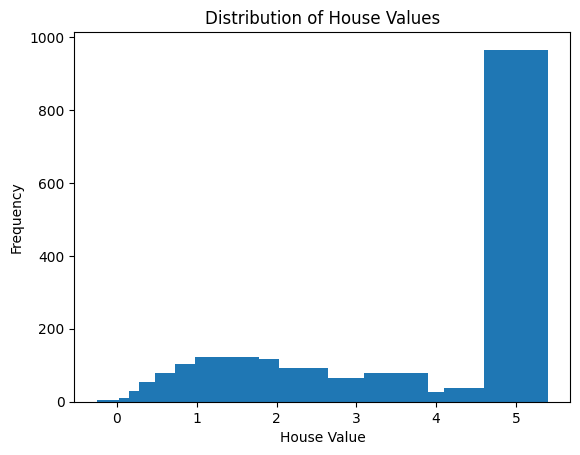

In [8]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets._california_housing import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

california_housing = fetch_california_housing()
x = california_housing.data
y = california_housing.target

# Data classes distribution
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('House Value')
plt.ylabel('Frequency')
plt.title('Distribution of House Values')
plt.show()

# Preprocessing & Model Training

In [48]:
_xtrain, test_x, _ytrain, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
_xtrain_scaled = scaler.fit_transform(_xtrain)
test_x_scaled = scaler.transform(test_x)

train_x, val_x, train_y, val_y = train_test_split(_xtrain_scaled, _ytrain, test_size=0.2, random_state=42)

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(train_x.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['r2_score', 'root_mean_squared_error'])


In [56]:
fit_history = model.fit(train_x, train_y, epochs=30, validation_data=(val_x, val_y))

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6658 - r2_score: 0.4978 - root_mean_squared_error: 0.8160 - val_loss: 0.5286 - val_r2_score: 0.6170 - val_root_mean_squared_error: 0.7270
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4579 - r2_score: 0.6546 - root_mean_squared_error: 0.6767 - val_loss: 0.4769 - val_r2_score: 0.6544 - val_root_mean_squared_error: 0.6906
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4128 - r2_score: 0.6887 - root_mean_squared_error: 0.6425 - val_loss: 0.4529 - val_r2_score: 0.6718 - val_root_mean_squared_error: 0.6730
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3893 - r2_score: 0.7064 - root_mean_squared_error: 0.6239 - val_loss: 0.3945 - val_r2_score: 0.7141 - val_root_mean_squared_error: 0.6281
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3720 - r2_score: 0.7194 - root_mean_squared_error: 0.6099 - val_loss: 0.3975 - val_r2_score: 0.7119 - val_root_mean_squared_error: 0.6305


# Evaluation

In [59]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,783 (233.53 KB)

 Trainable params: 59,781 (233.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [57]:
model.evaluate(test_x_scaled, test_y, verbose=1)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.2906 - r2_score: 0.7782 - root_mean_squared_error: 0.5391


[0.2906060814857483, 0.7782324552536011, 0.5390788912773132]

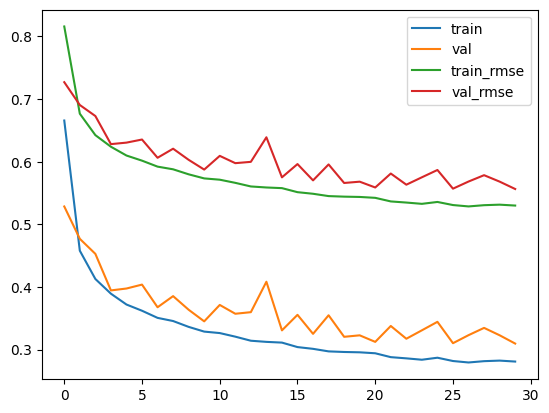

In [58]:
# show fit history
plt.plot(fit_history.history['loss'], label='train')
plt.plot(fit_history.history['val_loss'], label='val')
plt.plot(fit_history.history['root_mean_squared_error'], label='train_rmse')
plt.plot(fit_history.history['val_root_mean_squared_error'], label='val_rmse')
plt.legend()
plt.show()